# Questo è il file principale dove verranno effettuate delle analisi complete su tutti i dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Add count values on top of each bar
def add_count_on_bars(ax):
    # Add count values on top of each bar
    for p in ax.patches:
     ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

##### dataset dei generi dei film

In [3]:
genres_df = pd.read_csv("Main_data/genres.csv")
ids_movies = genres_df['id'].unique()

# visualizziamo i genere per gruppo di id
grouped_genres_df = genres_df.groupby('id')["genre"].agg(list).reset_index()

# selezioniamo i film che hanno il genere Comedy
grouped_genres_df[grouped_genres_df["genre"].apply(lambda x: "Comedy" in x)].reset_index(drop = True)
grouped_genres_df

print(len(ids_movies))


676491


##### dataset dei paesi di produzione

In [4]:
countries_df = pd.read_csv("Main_data/countries.csv")
grouped_countries_df = countries_df.groupby('id')["country"].agg(list).reset_index()
grouped_countries_df


,id,country
0,1000001,"[UK, USA]"
1,1000002,[South Korea]
2,1000003,[USA]
3,1000004,"[Germany, USA]"
4,1000005,"[Hong Kong, USA]"
...,...,...
617187,1941593,[China]
617188,1941594,[USA]
617189,1941595,[USA]
617190,1941596,[China]


In [5]:
# analizziamo brevemente il dataset dei paesi di produzione
x = countries_df["country"].unique()
x.tolist()
# calcolo quanti elementi ci sono 
len(x)

# controllo se ci sono paesi con più nomi
s = pd.Series(x)
s[s.str.contains("United", case = False, na = False)]

33                     United Arab Emirates
160             United Republic of Tanzania
238    United States Minor Outlying Islands
dtype: object

### eseguiamo delle analisi su un dataset composto per analizzare le correlazioni tra generi dei film

In [6]:
# uniamo i film con i loro generi
movies_df_norm = pd.read_csv("File_normalizzati/movies_normalized.csv")
movies_w_genres_df = pd.merge(movies_df_norm, grouped_genres_df, on = "id")
movies_w_genres_df

,id,name,date,description,minute,rating,genre
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,"[Comedy, Adventure]"
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"[Comedy, Thriller, Drama]"
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,"[Science Fiction, Adventure, Comedy, Action]"
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,[Drama]
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"[Drama, Comedy, Music, Romance]"
...,...,...,...,...,...,...,...
676486,1941559,你谁啊,NaN,NaN,67.0,NaN,[Comedy]
676487,1941563,数到三,NaN,NaN,NaN,NaN,[Drama]
676488,1941566,日本統一35,NaN,The leaders of the Kyowakai are surprised that...,80.0,NaN,[Crime]
676489,1941569,日本統一38,NaN,"Obuchi, the young leader of Gasonkai, a group ...",70.0,NaN,[Crime]


In [7]:
# eseguiamo una breve analisi esplorativa sul numero di film per genere ad esempio le commedie
movies_w_genres_df[movies_w_genres_df["genre"].apply(lambda x: "Comedy" in x)].reset_index(drop = True)
tot_comedy = movies_w_genres_df["genre"].apply(lambda x: "Comedy" in x).sum()
print(f"Totale delle commedie: {tot_comedy}")

Totale delle commedie: 140636


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Documentary'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Romance'),
  Text(6, 0, 'Thriller'),
  Text(7, 0, 'Music'),
  Text(8, 0, 'Action'),
  Text(9, 0, 'Crime'),
  Text(10, 0, 'Family'),
  Text(11, 0, 'TV Movie'),
  Text(12, 0, 'Adventure'),
  Text(13, 0, 'Fantasy'),
  Text(14, 0, 'Mystery'),
  Text(15, 0, 'Science Fiction'),
  Text(16, 0, 'History'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western')])

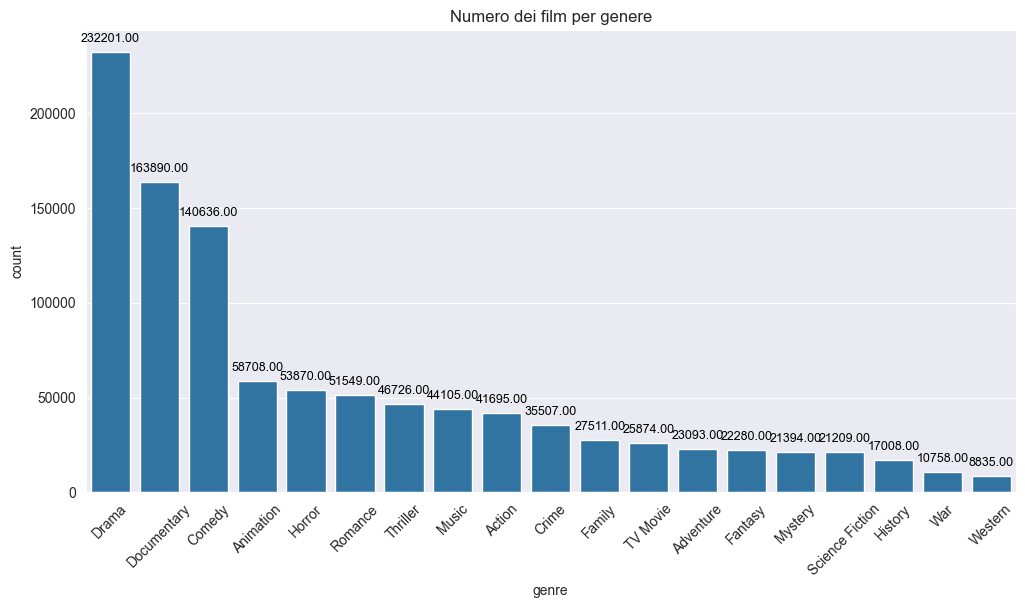

In [8]:
# mostriamo in un grafico il numero di film per genere
plt.figure(figsize=(12,6))
ax = sns.countplot(data = movies_w_genres_df.explode("genre"), x = "genre", order = movies_w_genres_df.explode("genre")["genre"].value_counts().index)
plt.title("Numero dei film per genere")
add_count_on_bars(ax)
plt.xticks(rotation = 45)


Il genre più apprezzato è Documentary con una valutazione media di 3.52


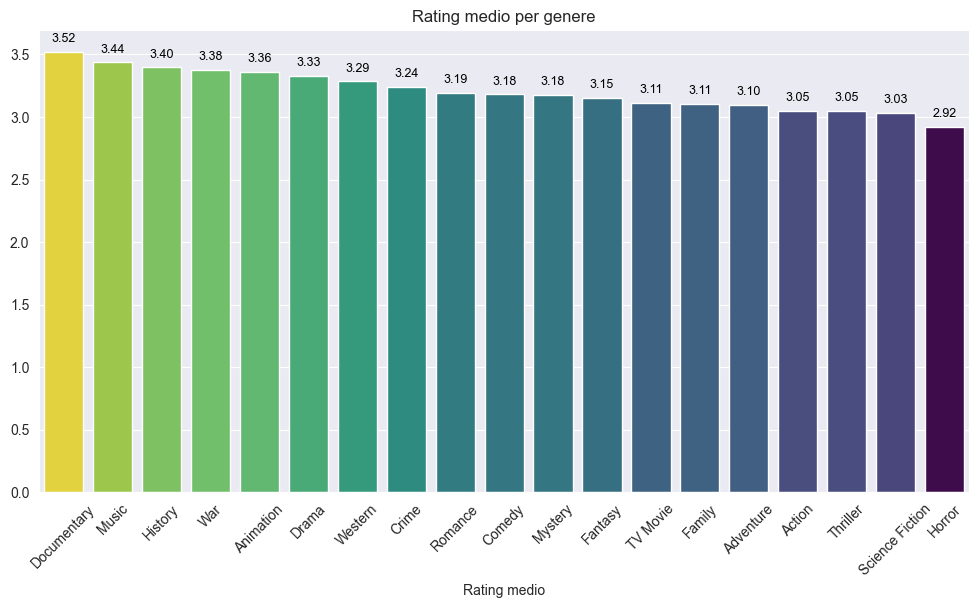

In [9]:
# mostriamo un grafico con il genere più apprezzato facendo una media dei rating
exploded_genres_df = movies_w_genres_df.explode("genre").reset_index(drop = True).copy()
genre_ratings_df = exploded_genres_df.groupby("genre")["rating"].mean().sort_values(ascending = False)

plt.figure(figsize= (12, 6))
ax = sns.barplot(y = genre_ratings_df.values, x = genre_ratings_df.index, hue = genre_ratings_df, palette = "viridis", order= genre_ratings_df.index, legend = False)
plt.title("Rating medio per genere")
plt.xlabel("Rating medio")
plt.xticks(rotation = 45)

add_count_on_bars(ax)

most_appreciated_genre = genre_ratings_df.index[0]
average_rating_most_appreciated = genre_ratings_df.iloc[0]
print(f"\nIl genre più apprezzato è {most_appreciated_genre} con una valutazione media di {average_rating_most_appreciated:.2f}")

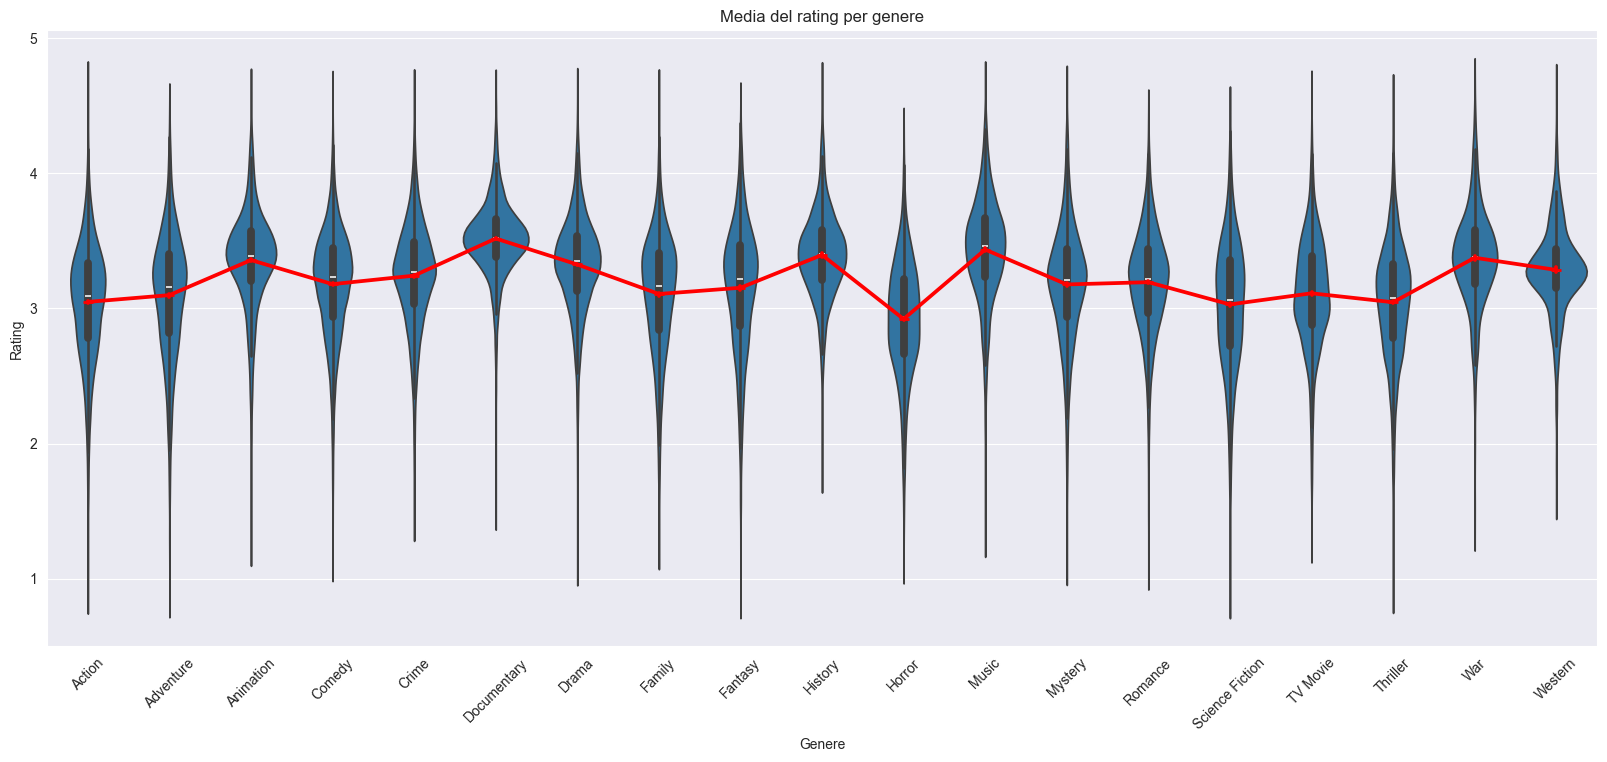

In [10]:
# utilizziamo un grafico a violino per mostrare la distribuzione del rating per ogni genere
plt.figure(figsize = (20, 8))

genre_order = sorted(exploded_genres_df['genre'].unique())

ax = sns.violinplot(data = exploded_genres_df, x = "genre", y = "rating", order = genre_order)

# Sovrapponi un pointplot per mostrare la media
# Useremo 'estimator' per calcolare la media, 'markers' per lo stile della linea,
# 'scale' per la sua lunghezza, e 'errorbar=None' (o 'ci=None' per versioni più vecchie di Seaborn)
# per non mostrare gli intervalli di confidenza.
# 'join=False' evita che le medie dei diversi generi vengano collegate da una linea.
sns.pointplot(data=exploded_genres_df,
              x="genre", y="rating",
              estimator='mean',
              markers='_',
              color='red',
              ax=ax,
              order=genre_order)

plt.title("Media del rating per genere")
plt.xlabel("Genere")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show()

#### eseguiamo un'analisi sui generi per vedere qual è il più apprezzato in determinati range di periodo

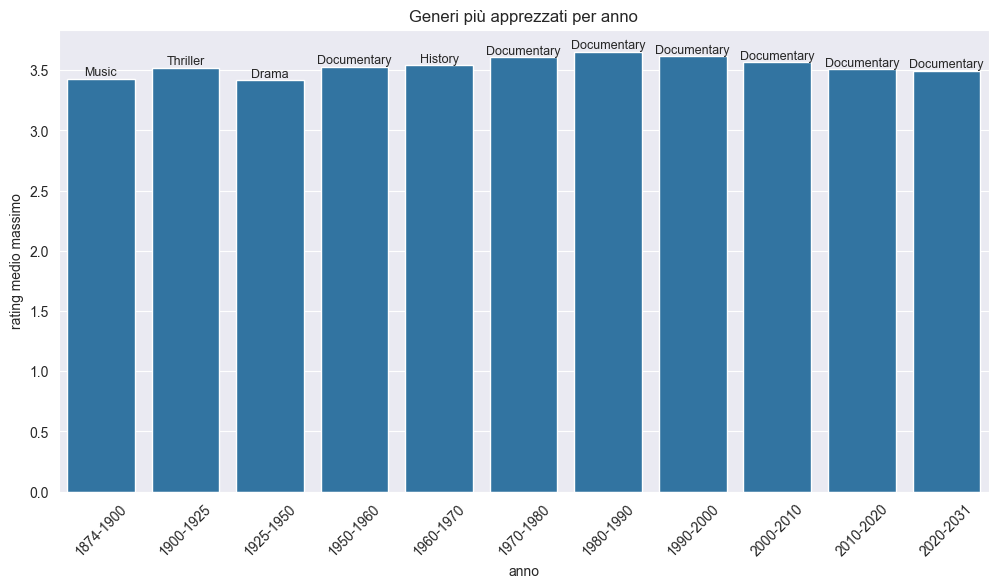

In [11]:
# creazione di un range di anni per analizzare i film in base al loro anno di uscita
year_range = [movies_w_genres_df["date"].min(), 1900, 1925, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, float("inf")]
labels = ["1874-1900", "1900-1925", "1925-1950", "1950-1960", "1960-1970", "1970-1980", "1980-1990", "1990-2000", "2000-2010", "2010-2020", "2020-2031"]

movies_w_genres_t_range_df = movies_w_genres_df.copy()
# nuova colonna per il range di anni
movies_w_genres_t_range_df["year_range"] = pd.cut(movies_w_genres_df["date"], bins = year_range, labels = labels, right = False)

# divisione dei generi dei film
exploded_genre_yr = movies_w_genres_t_range_df.explode("genre").copy()

# calcolo della media dei rating per ogni genere e range di anni
avg_rating_per_genre_range = exploded_genre_yr.groupby(["year_range", "genre"], observed = True)["rating"].mean().reset_index()

# indice per ottenere il rating massimo per selezionare il record corretto
idx = avg_rating_per_genre_range.groupby("year_range", observed=True)["rating"].idxmax()
top_genre_per_year = avg_rating_per_genre_range.loc[idx]

plt.figure(figsize = (12,6))
ax = sns.barplot(data = top_genre_per_year, x = "year_range", y = "rating")

# blocco di codice per stampare il genere sopra le barre  ------ NOTE: questo blocco di codice è stato realizzato in parte grazie all'aiuto dell'AI
for i, bar in enumerate(ax.patches):
    # Prendi la riga di dati corrispondente alla barra i-esima
    try:
        row_data = top_genre_per_year.iloc[i]
        genre_label = row_data['genre'] # Prendi il genere da quella riga

        ax.text(
            bar.get_x() + bar.get_width() / 2., # Posizione X (centro della barra)
            bar.get_height(),                   # Posizione Y (cima della barra)
            genre_label,                        # Testo da mostrare (il genere)
            ha='center',                        # Allineamento orizzontale
            va='bottom',                        # Allineamento verticale
            rotation=0,                         # Ruota leggermente
            fontsize=9                          # Dimensione font
        )
    except IndexError:
        print(f"Warning: Mismatch between number of bars ({len(ax.patches)}) and data rows ({len(top_genre_per_year)}) at index {i}. Skipping annotation.")


plt.title("Generi più apprezzati per anno")
plt.xlabel("anno")
plt.ylabel("rating medio massimo")
plt.xticks(rotation = 45)
plt.show()
    


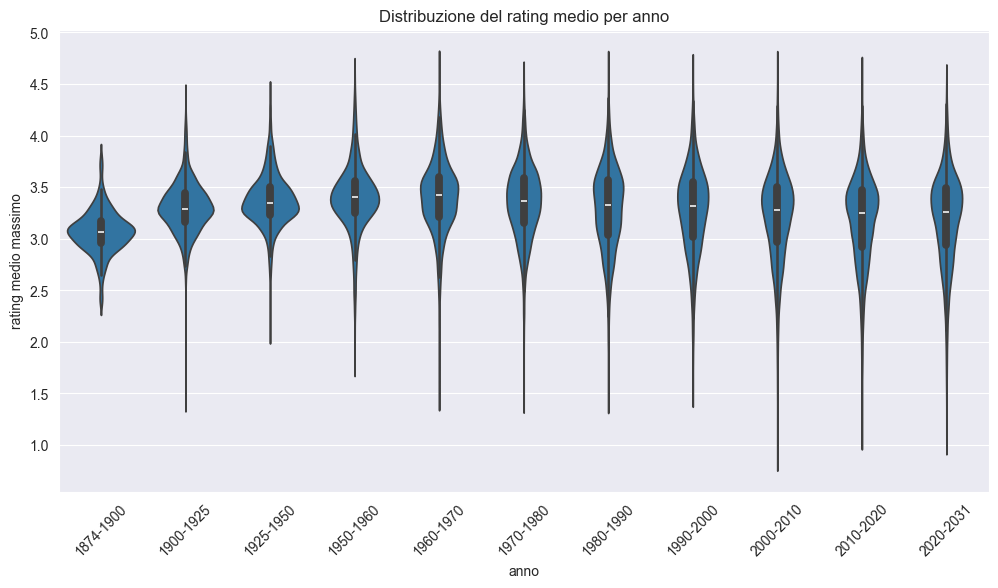

In [12]:
#violin plot diviso per range di anno
plt.figure(figsize = (12, 6))
ax = sns.violinplot(data = movies_w_genres_t_range_df, x = "year_range", y = "rating")
plt.title("Distribuzione del rating medio per anno")
plt.xlabel("anno")
plt.ylabel("rating medio massimo")
plt.xticks(rotation = 45)
plt.show()

##### calcoliamo l'andamento del rating per anno

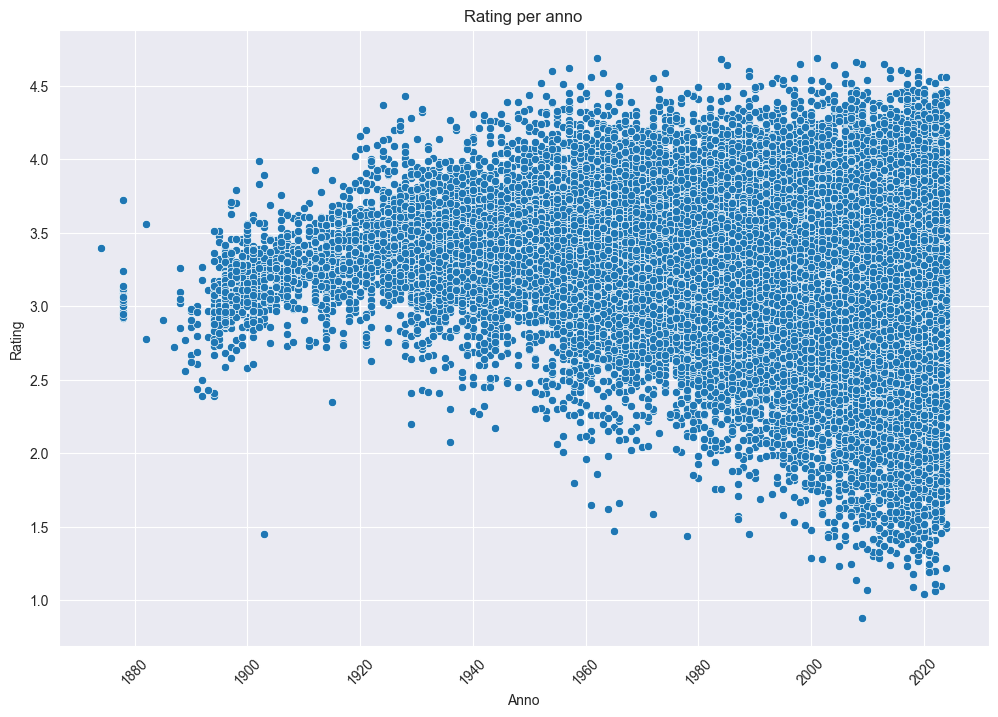

In [13]:
# data di uscita vs rating usando uno scatterplot
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(data = movies_w_genres_df, x = "date", y = "rating")

plt.title("Rating per anno")
plt.xlabel("Anno")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show()

##### quali sono i generi che hanno durata maggiore

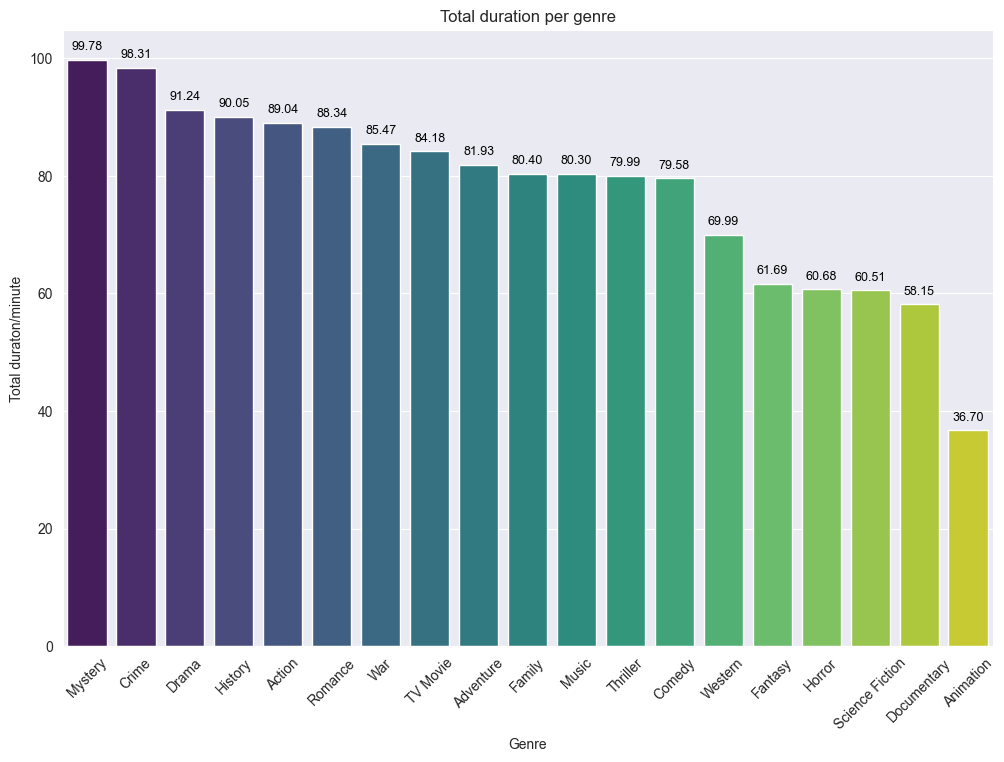

In [14]:
# raggruppiamo i generi e calcoliamo la media della durata per ognuno di essi così da trovare il genere che ha una durata maggiore
genre_duration_df = exploded_genres_df.groupby("genre")["minute"].mean()
genre_duration_df = genre_duration_df.sort_values(ascending = False)

plt.figure(figsize = (12, 8))
ax = sns.barplot(x = genre_duration_df.index, y = genre_duration_df.values, hue = genre_duration_df.index, palette = "viridis", order = genre_duration_df.index)
plt.title("Total duration per genre")
plt.xlabel("Genre")
plt.ylabel("Total duraton/minute")
plt.xticks(rotation = 45)

add_count_on_bars(ax)

plt.show()

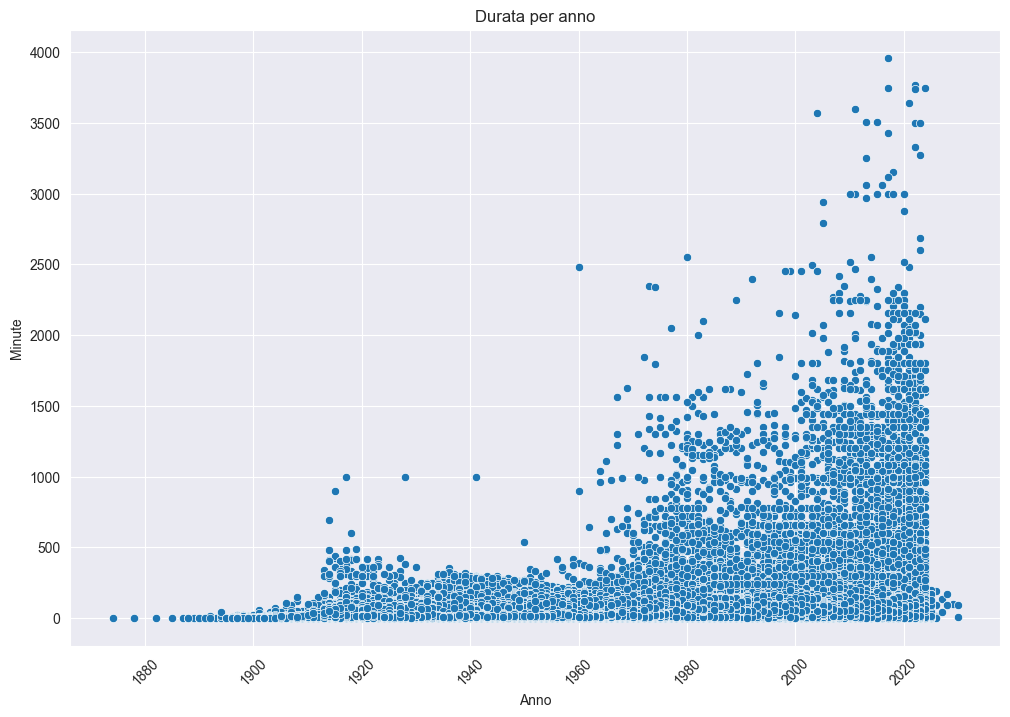

In [15]:
# proiezione di come è variato il minutaggio nel tempo
plt.figure(figsize = (12, 8))
# selezioniamo un minutaggio massimo per evitare outliers o film con una durata eccessiva per non disturbare la visualizzazione
movies_duration_df = movies_w_genres_df[movies_w_genres_df["minute"] < 4000]
ax = sns.scatterplot(data = movies_duration_df, x = "date", y = "minute")
plt.title("Durata per anno")
plt.xlabel("Anno")
plt.ylabel("Minute")
plt.xticks(rotation = 45)
plt.show()

##### altre analisi da effettuare sul dataset movies_w_genres_df

In [16]:
# di che genere sono i film che hanno una maggiore durata
cols = ["name", "minute","genre", "date"]
# selezioniamo un valore per determinare quali sono i film che hanno una durata maggiore ad esempio 10000 minuti
movies_w_genres_df.loc[movies_w_genres_df["minute"] > 10000][cols]


,name,minute,genre,date
27574,Logistics,51420.0,[Documentary],2011.0
71193,Cinématon,12480.0,[Documentary],1978.0
92434,Modern Times Forever,14400.0,[Documentary],2011.0
181510,Al Zeer Salem,72000.0,[Drama],2000.0
285645,Svalbard minutt for minutt,13319.0,[Documentary],2020.0
384426,Eighteen Springs,58800.0,[Drama],2002.0


#### calcoliamo quale dovrebbe essere la durata di un film per ogni genre in base al rating

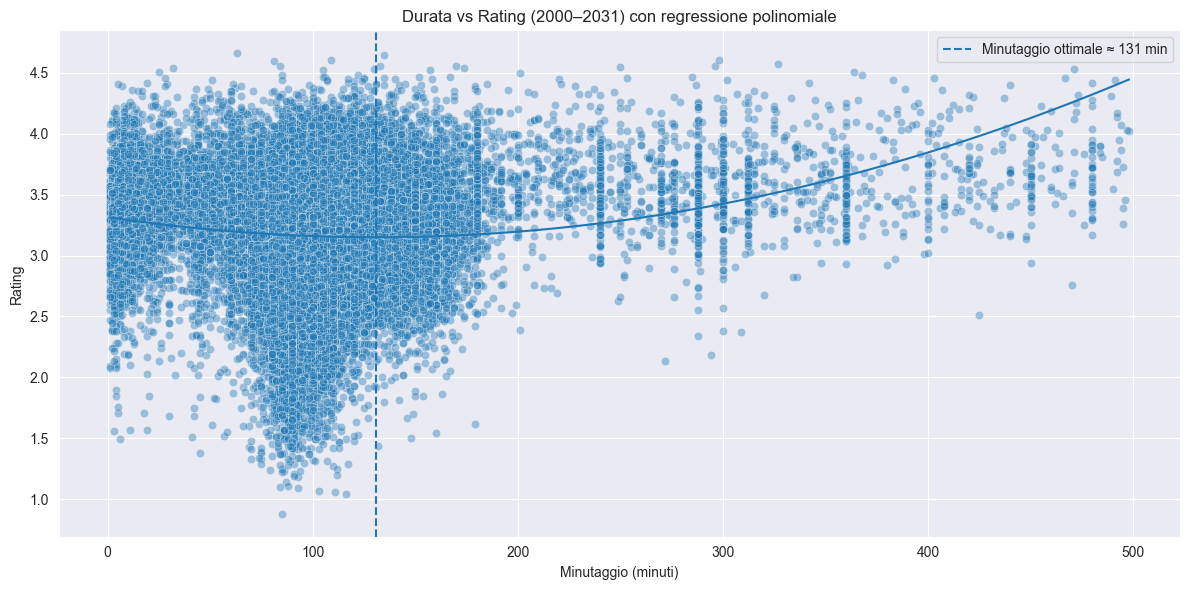

In [17]:
# prendiamo in esame il range che va dal 2000 al 2031 e proviamo a calcolare quale dovrebbe essere il minutaggio corretto per aumentare le probabilità di avere un rating maggiore.
# etichette che contengono gli anni dal 2000 al 2031
target_labels = ["2000-2010", "2010-2020", "2020-2031"]
# filtro su year_range
movies_2000_2031 = (movies_w_genres_t_range_df[movies_w_genres_t_range_df["year_range"].isin(target_labels)]
                    .dropna(subset = ["minute", "rating"])).query("minute < 500")


# il codice è stato generato grazie al supporto dell'AI ----------------------------

# 2) Estrai le variabili
X = movies_2000_2031["minute"].values
Y = movies_2000_2031["rating"].values

# 3) Fit polinomiale di grado 2: y ≈ a·x² + b·x + c
a, b, c = np.polyfit(X, Y, deg=2)

# 4) Calcola il vertice della parabola (minuto ottimale)
optimal_minute = -b / (2 * a)

# 5) Crea il plot
x_range = np.linspace(X.min(), X.max(), 500)
y_pred  = np.polyval([a, b, c], x_range)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X, y=Y, alpha=0.4)
plt.plot(x_range, y_pred)
plt.axvline(optimal_minute, linestyle="--",
            label=f"Minutaggio ottimale ≈ {optimal_minute:.0f} min")
plt.title("Durata vs Rating (2000–2031) con regressione polinomiale")
plt.xlabel("Minutaggio (minuti)")
plt.ylabel("Rating")
plt.legend()
plt.tight_layout()
plt.show()

### Analisi su un dataset composto per analizzare le correlazioni dei film per paese di produzione

In [18]:
movies_w_country_df = pd.merge(movies_df_norm, grouped_countries_df, on = "id")

# creaimo una copia del dataset
movies_w_country_exp_df = movies_w_country_df.explode("country").copy().reset_index(drop = True)

# ci concentriamo sui paesi che hanno prodotto più di 10000 film in quanto rappresentare tutte le nazioni che hanno prodotto un film altera le rappresentazioni grafiche
country_group_df = movies_w_country_exp_df.groupby("country")["id"].count().reset_index()
country_group_df = country_group_df[country_group_df["id"] > 10000]["country"]

In [19]:

country_group_df.unique()


array(['Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Italy',
       'Japan', 'Mexico', 'Russian Federation', 'South Korea', 'Spain',
       'UK', 'USA'], dtype=object)

In [20]:

movies_w_best_country_df = movies_w_country_exp_df.merge(country_group_df, on = "country")
movies_w_best_country_df["country"].unique()

array(['UK', 'USA', 'South Korea', 'Germany', 'Canada', 'Japan', 'China',
       'France', 'Brazil', 'Italy', 'India', 'Spain', 'Mexico',
       'Russian Federation'], dtype=object)

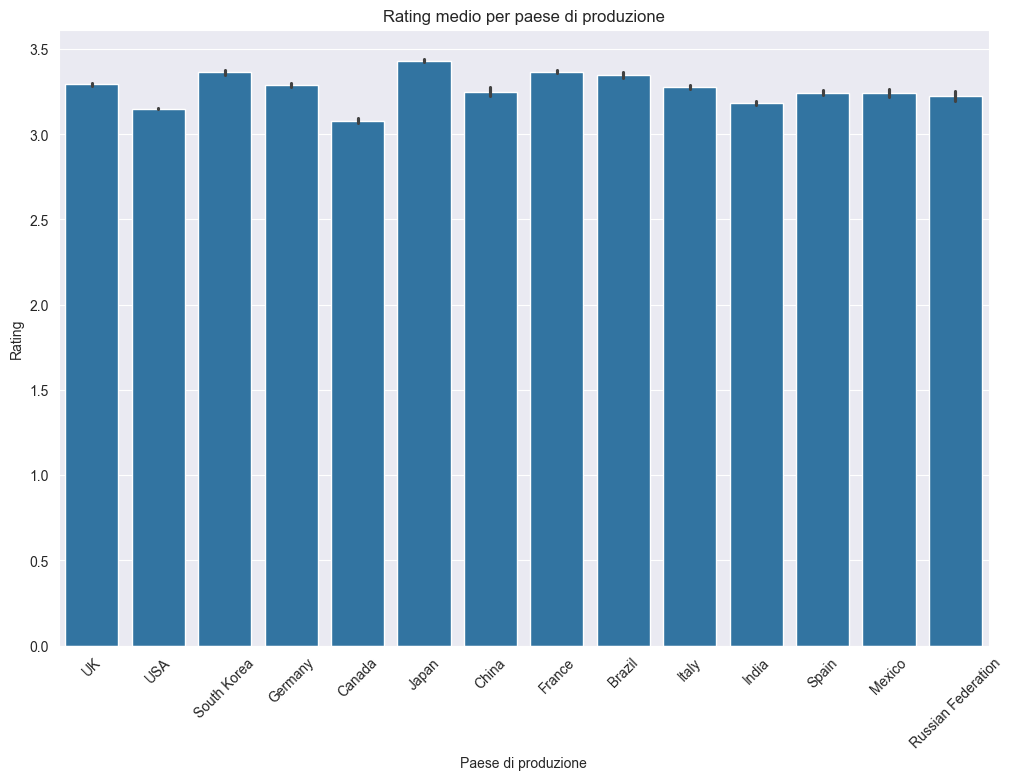

In [21]:
# calcoliamo qual è il rating medio per ogni paese di produzione
plt.figure(figsize = (12, 8))
ax = sns.barplot(data = movies_w_best_country_df, x = "country", y = "rating")

plt.title("Rating medio per paese di produzione")
plt.xlabel("Paese di produzione")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show()

##### analizziamo i generi prodotti dalle varie nazioni

In [40]:
# creaiamo un ulteriore dataset che contiene i generi, i paesi di produzione e il range di anno di produzione
movies_w_genres_and_country_df = pd.merge(movies_w_best_country_df, exploded_genre_yr, on = ["id", "name", "date", "description", "minute", "rating"])

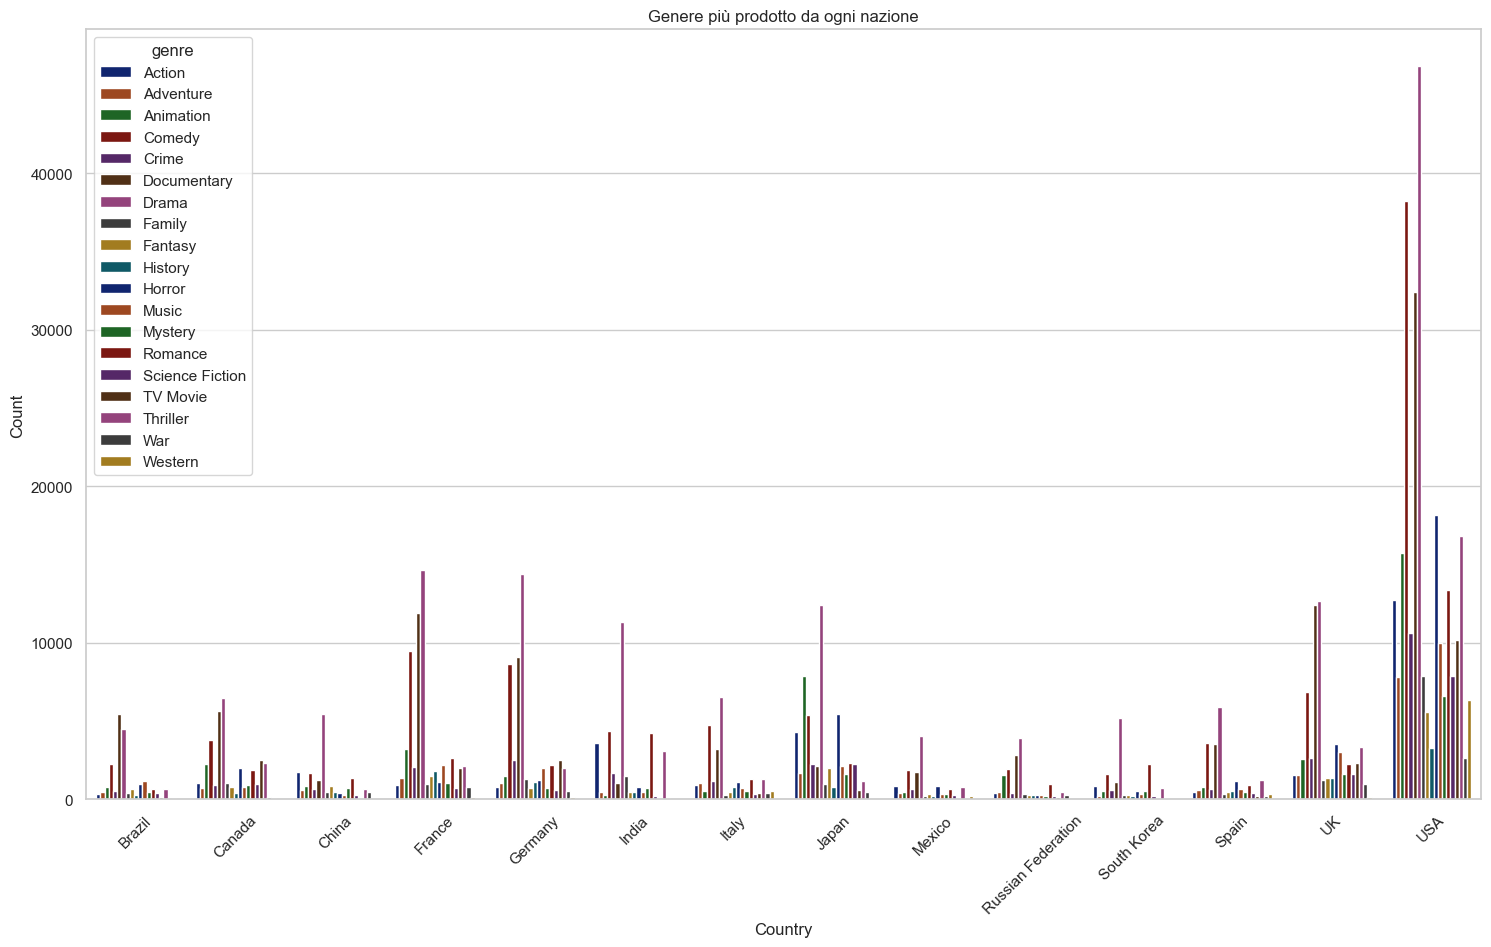

,country,genre,n_film
0,Brazil,Action,321
1,Brazil,Adventure,482
2,Brazil,Animation,789
3,Brazil,Comedy,2275
4,Brazil,Crime,549
...,...,...,...
261,USA,Science Fiction,7895
262,USA,TV Movie,10209
263,USA,Thriller,16853
264,USA,War,2646


In [139]:
# quali generi sono stati prodotti maggiormente dalle varie nazioni
df = movies_w_genres_and_country_df.groupby(["country", "genre"]).size().reset_index(name = "n_film")
plt.figure(figsize = (18, 10))

ax = sns.barplot(data = df, x = "country", y = "n_film", hue = "genre", palette = "dark")
plt.title("Genere più prodotto da ogni nazione")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

##### calcoliamo anche la media dei generi per ogni paese di produzione

In [77]:
# da utilizzare in ausilio per il grafico precedente per una valutazione più accurata
movie_rating_per_country = movies_w_genres_and_country_df.groupby(["country", "genre"])["rating"].mean()
movie_rating_per_country

country  genre          
Brazil   Action             3.088491
         Adventure          3.103263
         Animation          3.290110
         Comedy             3.141832
         Crime              3.376000
                              ...   
USA      Science Fiction    2.899351
         TV Movie           3.035299
         Thriller           2.924657
         War                3.308542
         Western            3.270096
Name: rating, Length: 266, dtype: float64

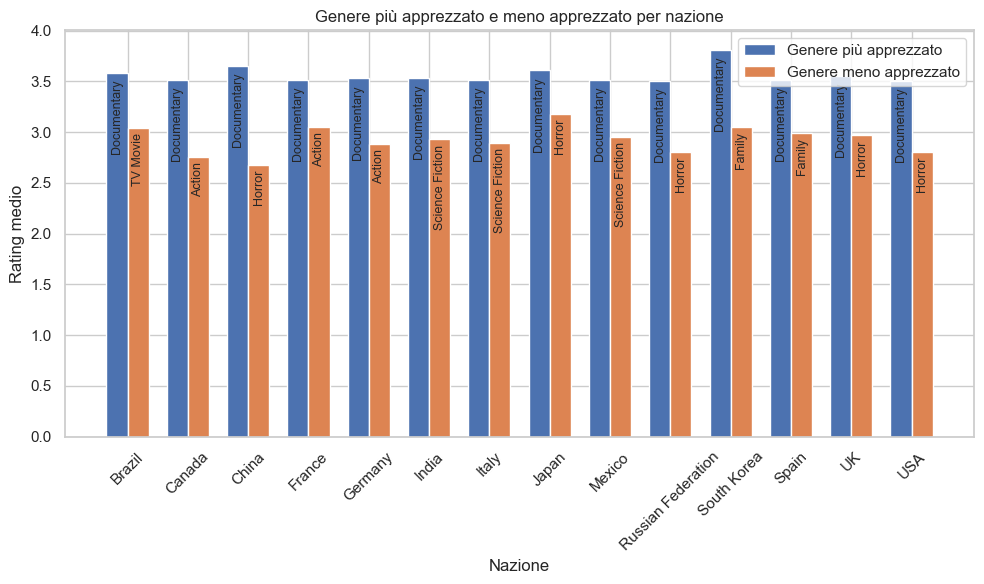

In [137]:
# adesso calcoliamo il genere più apprezzato e più detestato per ogni nazione
rating = movie_rating_per_country.reset_index()
idx_best = rating.groupby("country")["rating"].idxmax()
idx_worst = rating.groupby("country")["rating"].idxmin()

best  = rating.loc[idx_best].assign(type="Best")
worst = rating.loc[idx_worst].assign(type="Worst")

# BLOCCO DI CODICE GENERATO CON L'AUSILIO DELL'AI -----------------------------
# 3. Prepara i dati per il plot
countries    = best['country'].values
n_countries  = len(countries)
positions    = np.arange(n_countries)
width        = 0.35

best_vals    = best.set_index('country').loc[countries]['rating']
worst_vals   = worst.set_index('country').loc[countries]['rating']
best_genres  = best.set_index('country').loc[countries]['genre']
worst_genres = worst.set_index('country').loc[countries]['genre']

# 4. Disegna le barre
plt.figure(figsize=(10,6))
bars_best  = plt.bar(positions - width/2, best_vals,  width, label='Genere più apprezzato')
bars_worst = plt.bar(positions + width/2, worst_vals, width, label='Genere meno apprezzato')

# 5. Annotazioni verticali
for bar, genre in zip(bars_best, best_genres):
    plt.text(
        bar.get_x() + bar.get_width()/2,          # x center
        bar.get_height() - 0.8,                  # y just above
        genre,                                    # text
        ha='center',                              # align center horizontally
        va='bottom',                              # align text baseline
        rotation=90,                              # rotate vertical
        fontsize=9
    )

for bar, genre in zip(bars_worst, worst_genres):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() - 0.05,
        genre,
        ha='center',
        va='top',
        rotation=90,
        fontsize=9
    )
# -------------------------------

plt.xticks(positions, countries, rotation=45)
plt.ylabel('Rating medio')
plt.xlabel('Nazione')
plt.title('Genere più apprezzato e meno apprezzato per nazione')
plt.legend()
plt.tight_layout()
plt.show()

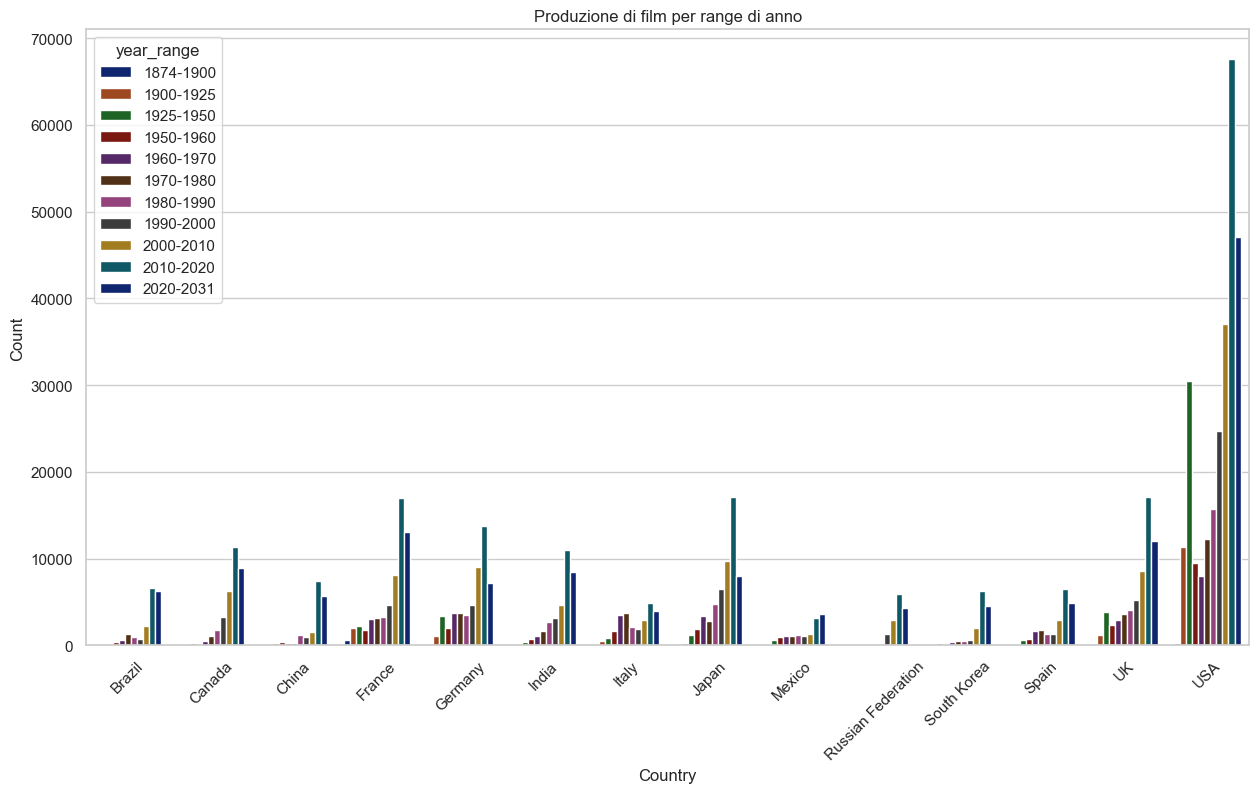

In [162]:
# in che range di anni ogni paese ha prodotto più film
df = movies_w_genres_and_country_df.groupby(["country", "year_range"], observed = True)["id"].size().reset_index(name = "n_films")
plt.figure(figsize = (15, 8))

ax = sns.barplot(data = df, x = "country", y = "n_films", hue = "year_range", palette = "dark")
plt.title("Produzione di film per range di anno")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

### Utilizzo del dataset Crew

In [177]:
crew_csv = pd.read_csv("Main_data/crew.csv")

crew_df = crew_csv[crew_csv["role"].isin(["Director", "Producer"])].reset_index(drop = True)
crew_df

,id,role,name
0,1000001,Director,Greta Gerwig
1,1000001,Producer,Tom Ackerley
2,1000001,Producer,Margot Robbie
3,1000001,Producer,Robbie Brenner
4,1000001,Producer,David Heyman
...,...,...,...
1467212,1941560,Producer,Wong Kar-wai
1467213,1941563,Director,Lin Sun
1467214,1941589,Director,田磊
1467215,1941596,Director,Marc Ma


### Utilizzo del dataset Themes

In [178]:
themes_df = pd.read_csv("Main_data/themes.csv")
themes_df

,id,theme
0,1000001,Humanity and the world around us
1,1000001,Crude humor and satire
2,1000001,Moving relationship stories
3,1000001,Emotional and captivating fantasy storytelling
4,1000001,Surreal and thought-provoking visions of life ...
...,...,...
125636,1835643,Noir and dark crime dramas
125637,1835643,Intriguing and suspenseful murder mysteries
125638,1849827,Faith and religion
125639,1849827,Faith and spiritual journeys
